In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To Load Dataset
df=pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
#First Remove Column,because not needed 
df.drop(["ID","ZIP Code"],axis=1,inplace=True)

In [5]:
#To Check Null Values
df.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


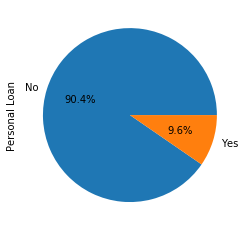

In [7]:
df["Personal Loan"].value_counts().plot.pie(autopct="%1.1f%%",labels=['No','Yes'])
plt.show()

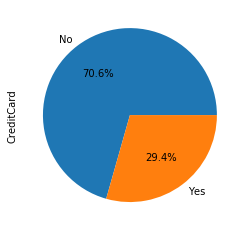

In [8]:
df["CreditCard"].value_counts().plot.pie(autopct="%1.1f%%",labels=['No','Yes'])
plt.show()

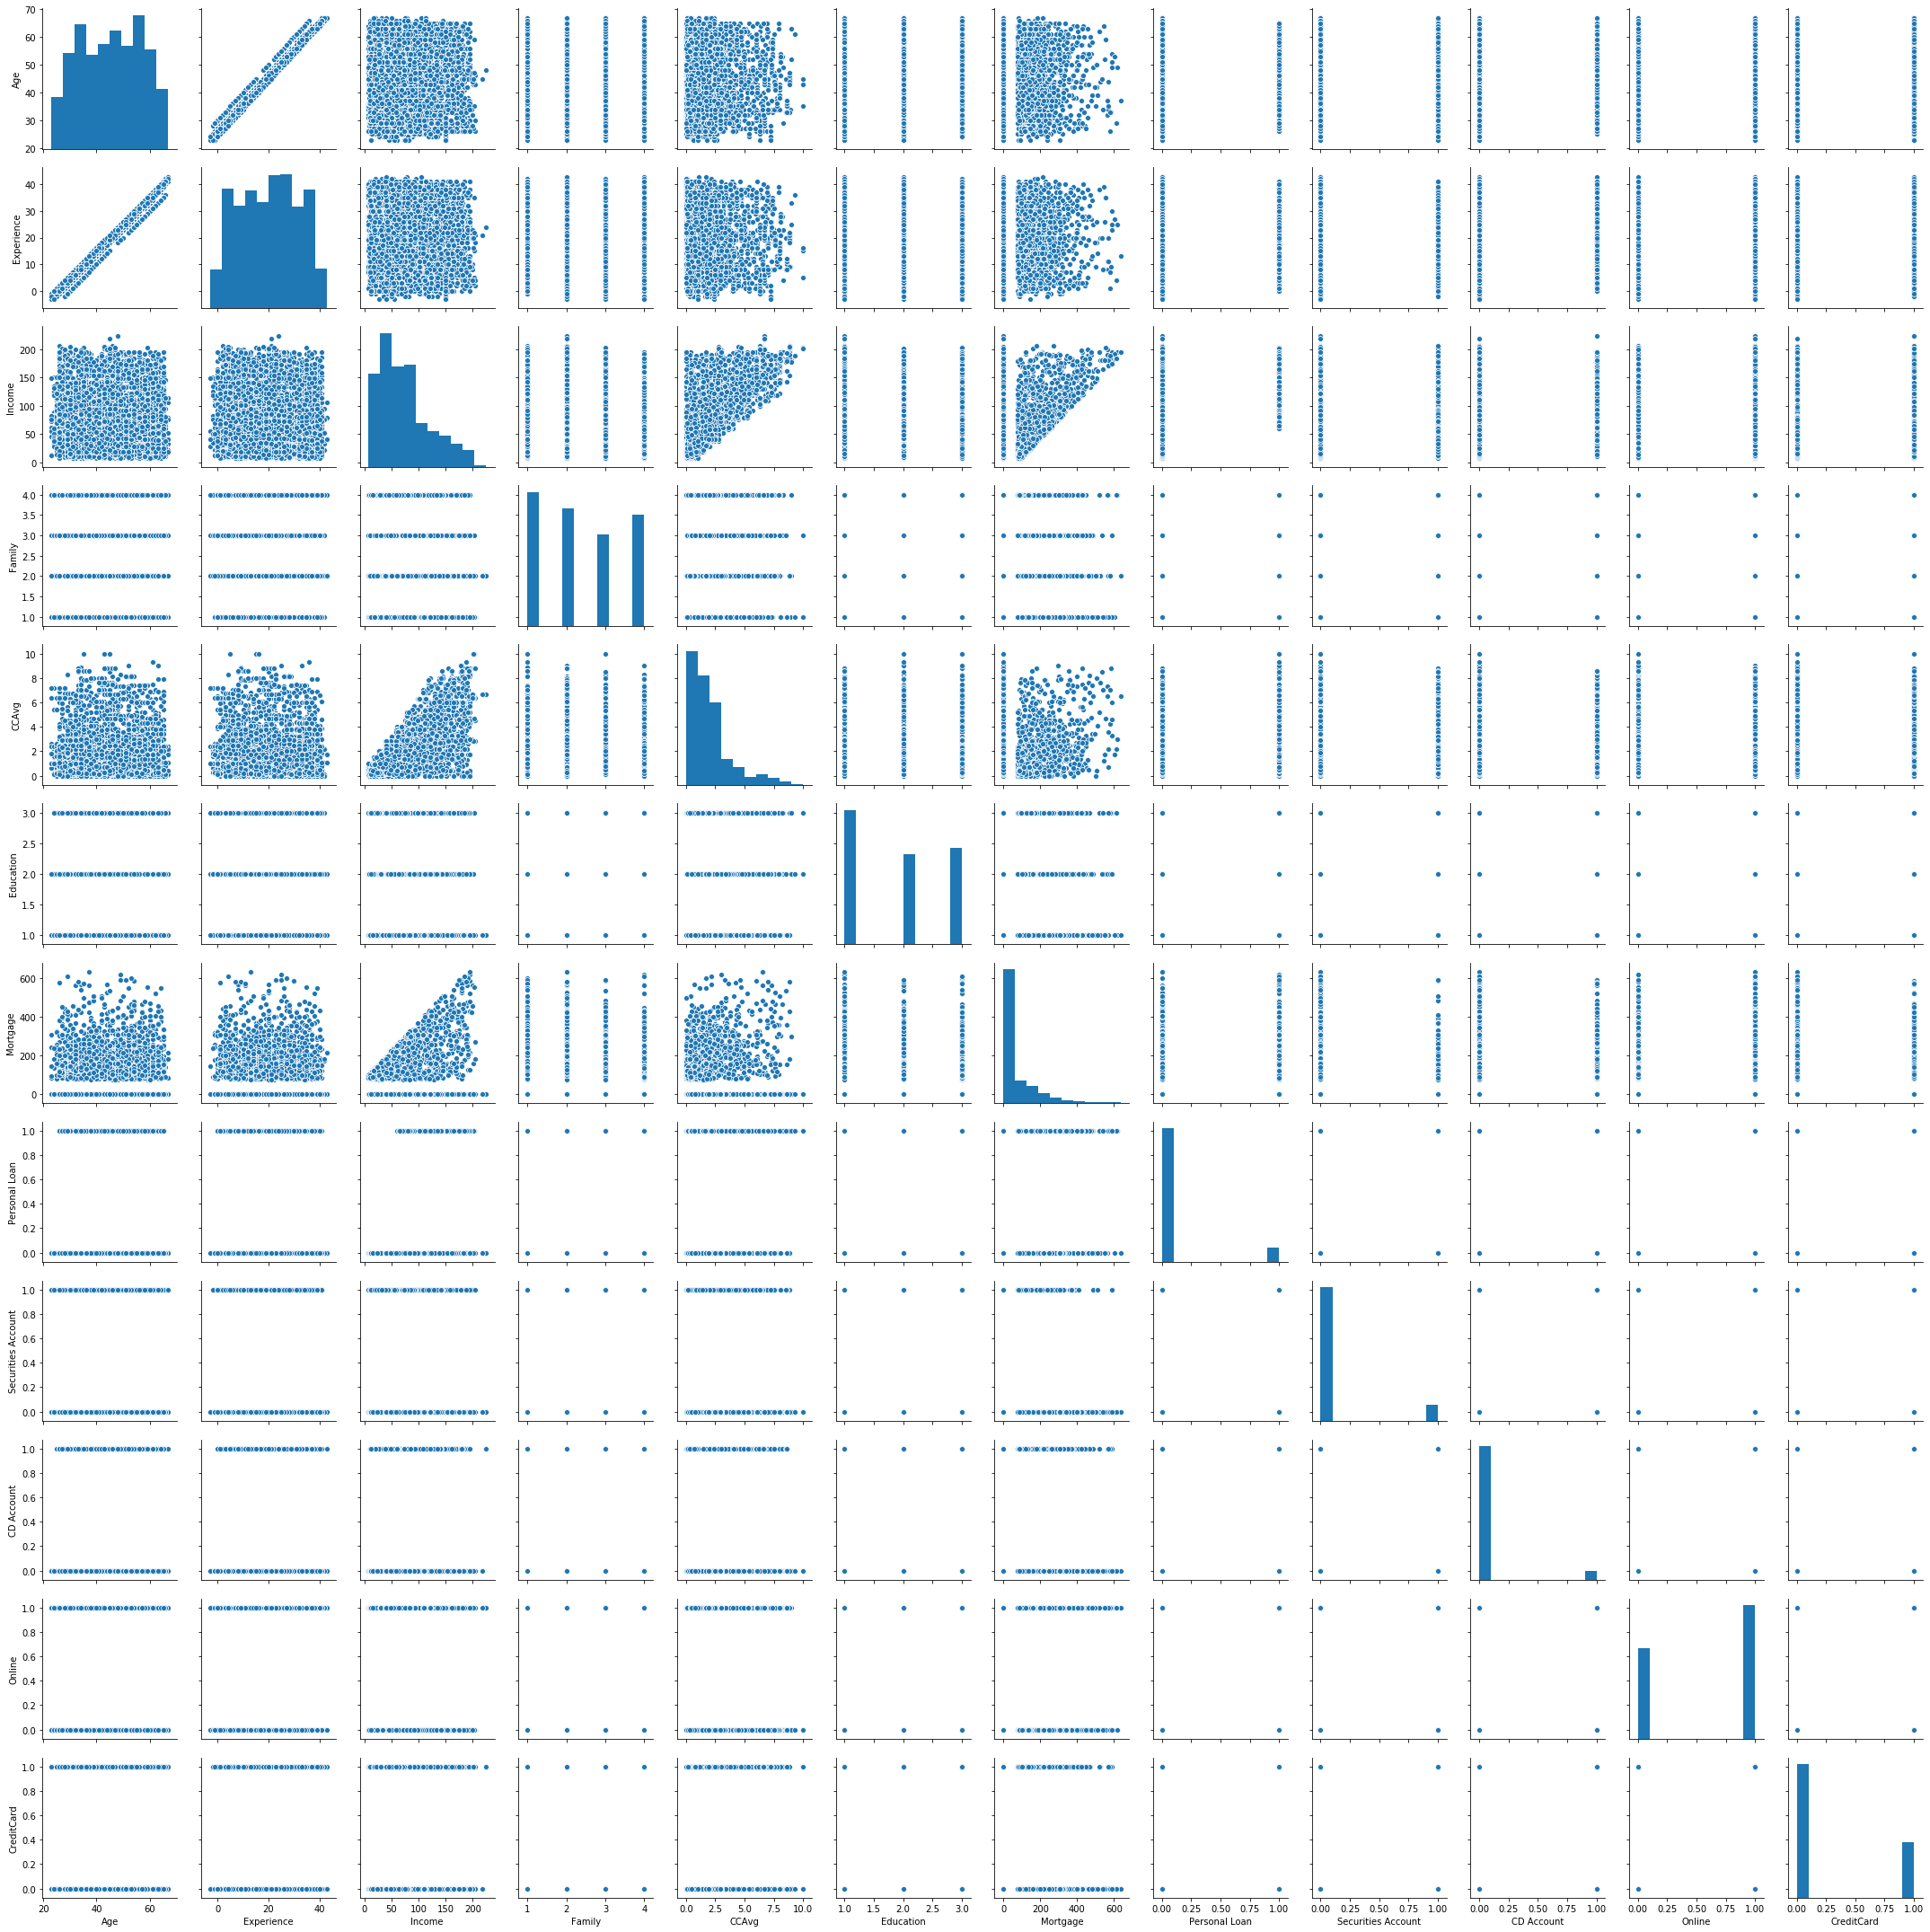

In [9]:
sns.pairplot(df)
plt.show()

# OUTLIER

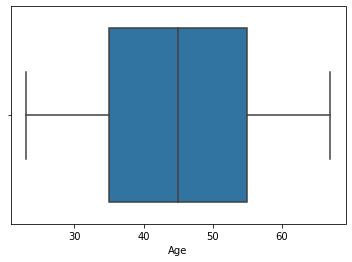

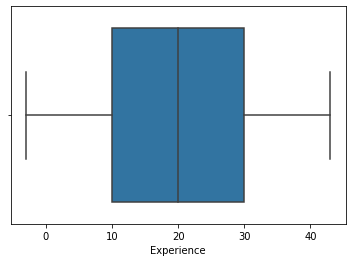

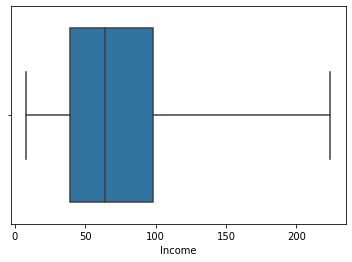

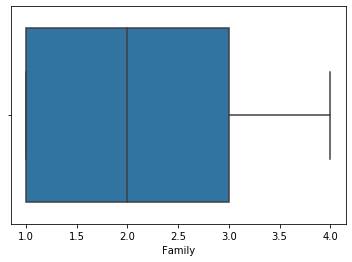

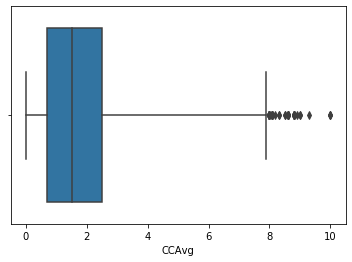

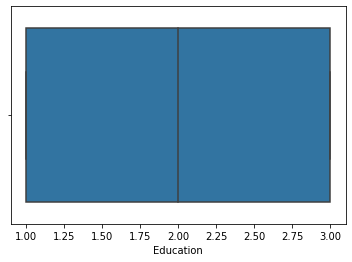

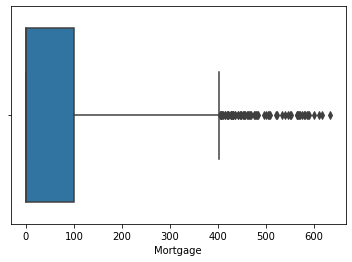

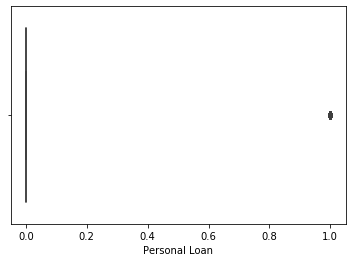

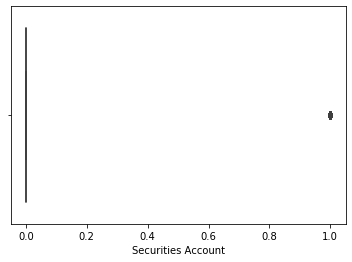

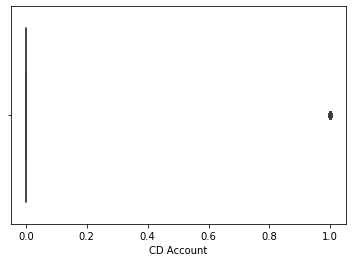

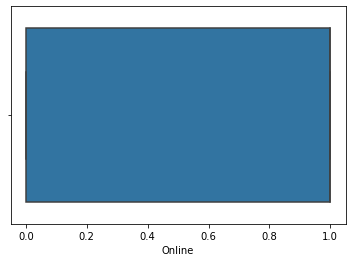

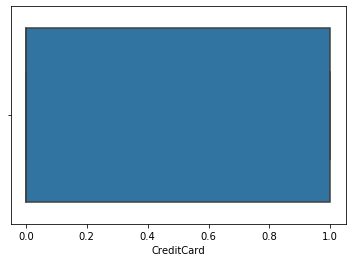

In [10]:
for col in df:
    plt.figure()
    sns.boxplot(data=df,x=col,whis=3)
    plt.show()

# skewness

In [11]:
#to check skewness value 
from scipy.stats import skew

Age
-0.029331878574766698


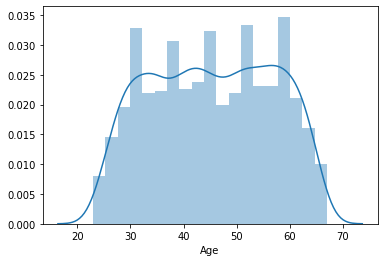

Experience
-0.026316790337654442


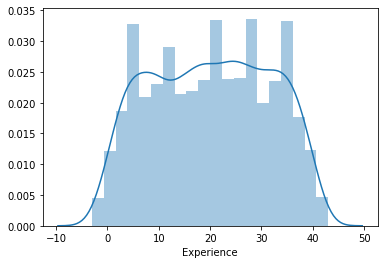

Income
0.8410861846424931


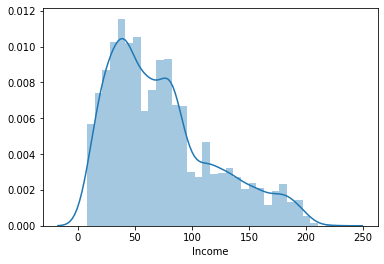

Family
0.15517409936178264


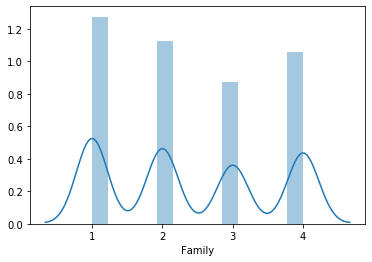

CCAvg
1.5979637637001873


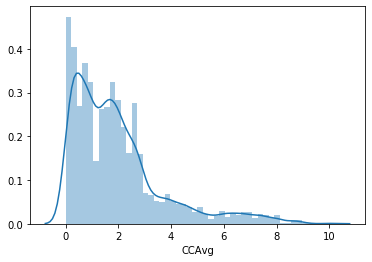

Education
0.22702518198805896


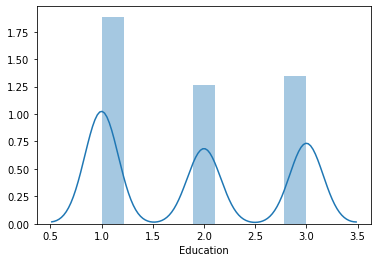

Mortgage
2.103371065804789


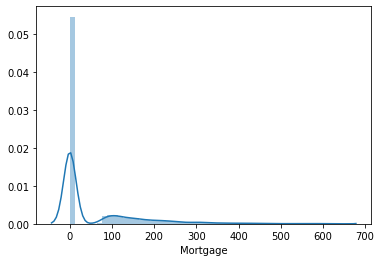

Personal Loan
2.74278350529752


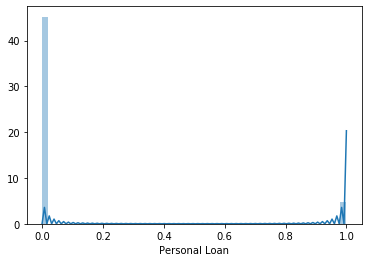

Securities Account
2.587491827731683


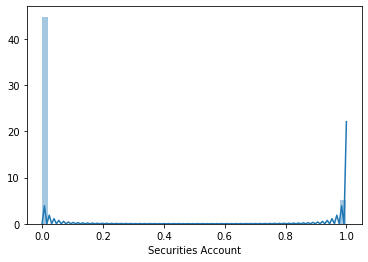

CD Account
3.6906061919698963


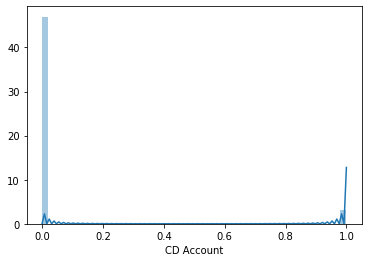

Online
-0.3946668814543566


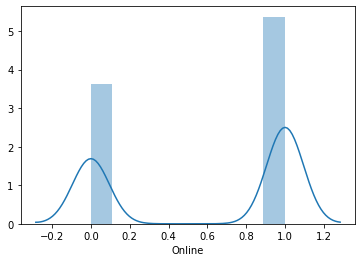

CreditCard
0.904318051969846


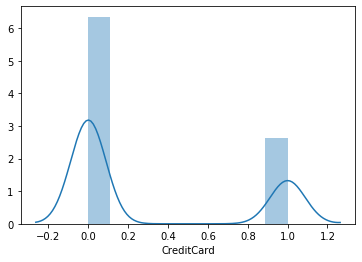

In [12]:
for col in df:
    print(col)
    print(skew(df[col]))
    plt.figure()
    sns.distplot(df[col])
    plt.show()

In [13]:
#To Check Corelation
df.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.010353,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


[]

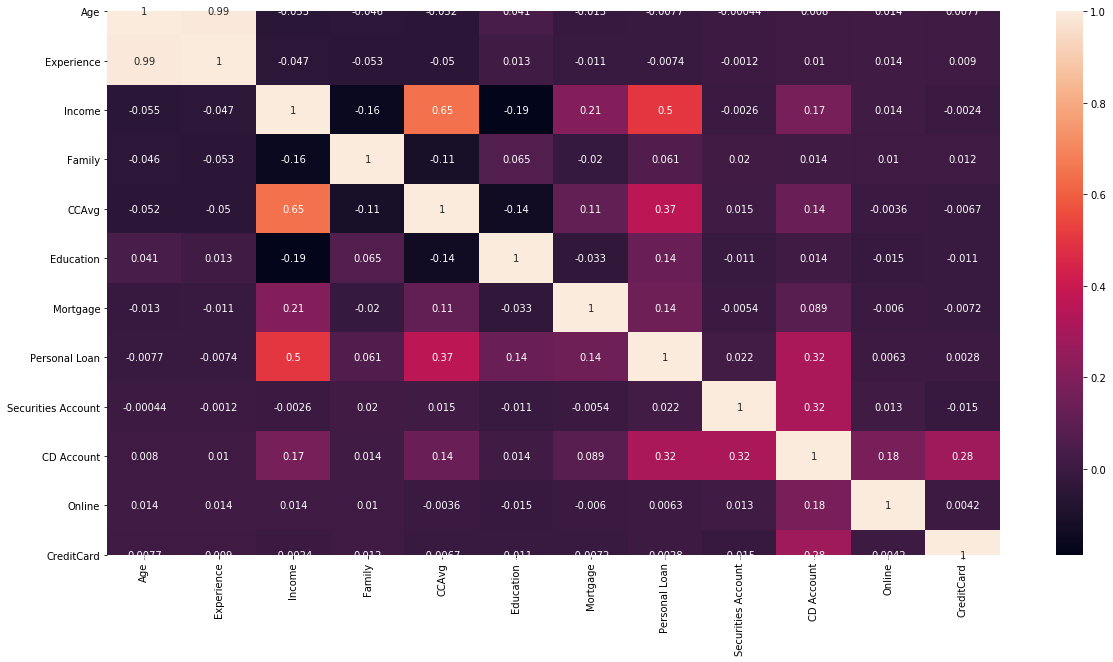

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.plot()

# Performing The Model

In [15]:
#separate the target variable and independent variable
x=df.drop("Personal Loan",axis=1)  #independent variable
y=df["Personal Loan"] #dependent variabale(target variable) to predict

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
#Train_test_split:separate dataset into train and test split 70% & 30%
#random state if 1 it takes random and if 0 it takes sequencly
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
from sklearn.metrics import classification_report

In [20]:
#function create
def create_model(model):
    model.fit(x_train,y_train)#we train the model
    y_pred=model.predict(x_test) #test
    print(classification_report(y_test,y_pred))
    return model

In [21]:
#create the object of LogisticRegression class
lr=LogisticRegression()

In [22]:
#call function
create_model(lr)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.82      0.54      0.65       149

    accuracy                           0.94      1500
   macro avg       0.89      0.76      0.81      1500
weighted avg       0.94      0.94      0.94      1500



LogisticRegression()

# Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
#create a object of Decision Tree
dt=DecisionTreeClassifier()

In [25]:
#we create a decision tree model then call create_model()
#call function create_model()
dt1=create_model(dt)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1351
           1       0.91      0.89      0.90       149

    accuracy                           0.98      1500
   macro avg       0.95      0.94      0.94      1500
weighted avg       0.98      0.98      0.98      1500



In [26]:
dt.feature_importances_

array([0.02144165, 0.01673849, 0.31306348, 0.16215669, 0.04663199,
       0.40591434, 0.00778111, 0.        , 0.02571145, 0.00056079,
       0.        ])

In [27]:
x.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [28]:
#we create a model for decision tree
from sklearn import tree

In [29]:
features=x.columns

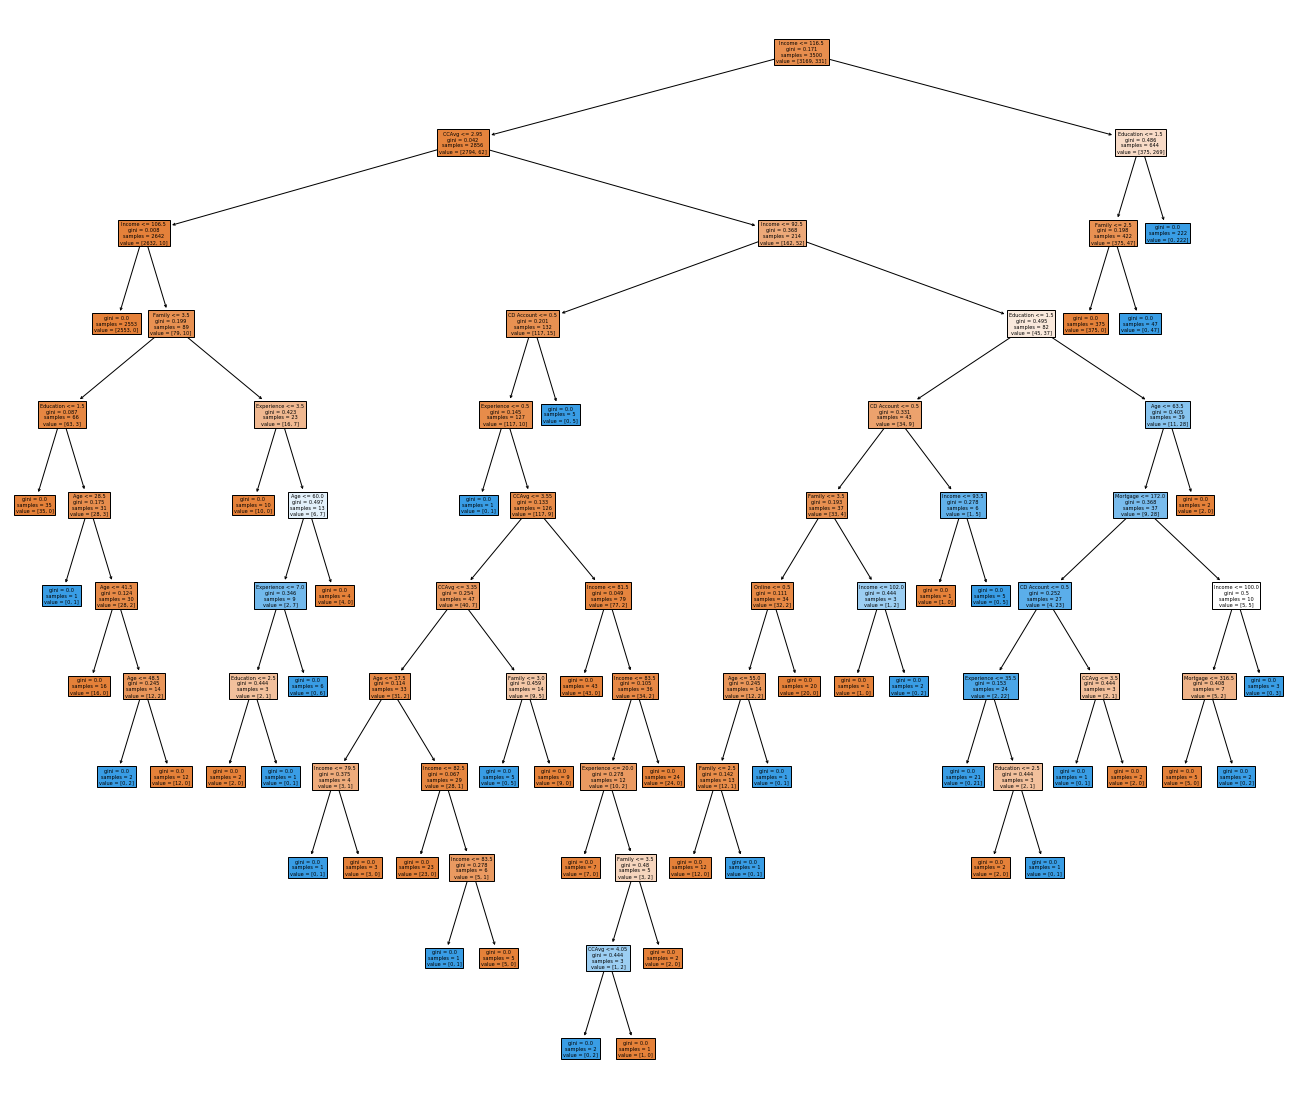

In [30]:
fig=plt.figure(figsize=(23,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

# Pruning Technique

In [31]:
'''1.First pruning tech. with the help of max_depth()'''
dt1=DecisionTreeClassifier(max_depth=5) #max_depth not more than 8

In [32]:
#call function create_model()
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1351
           1       0.91      0.89      0.90       149

    accuracy                           0.98      1500
   macro avg       0.95      0.94      0.94      1500
weighted avg       0.98      0.98      0.98      1500



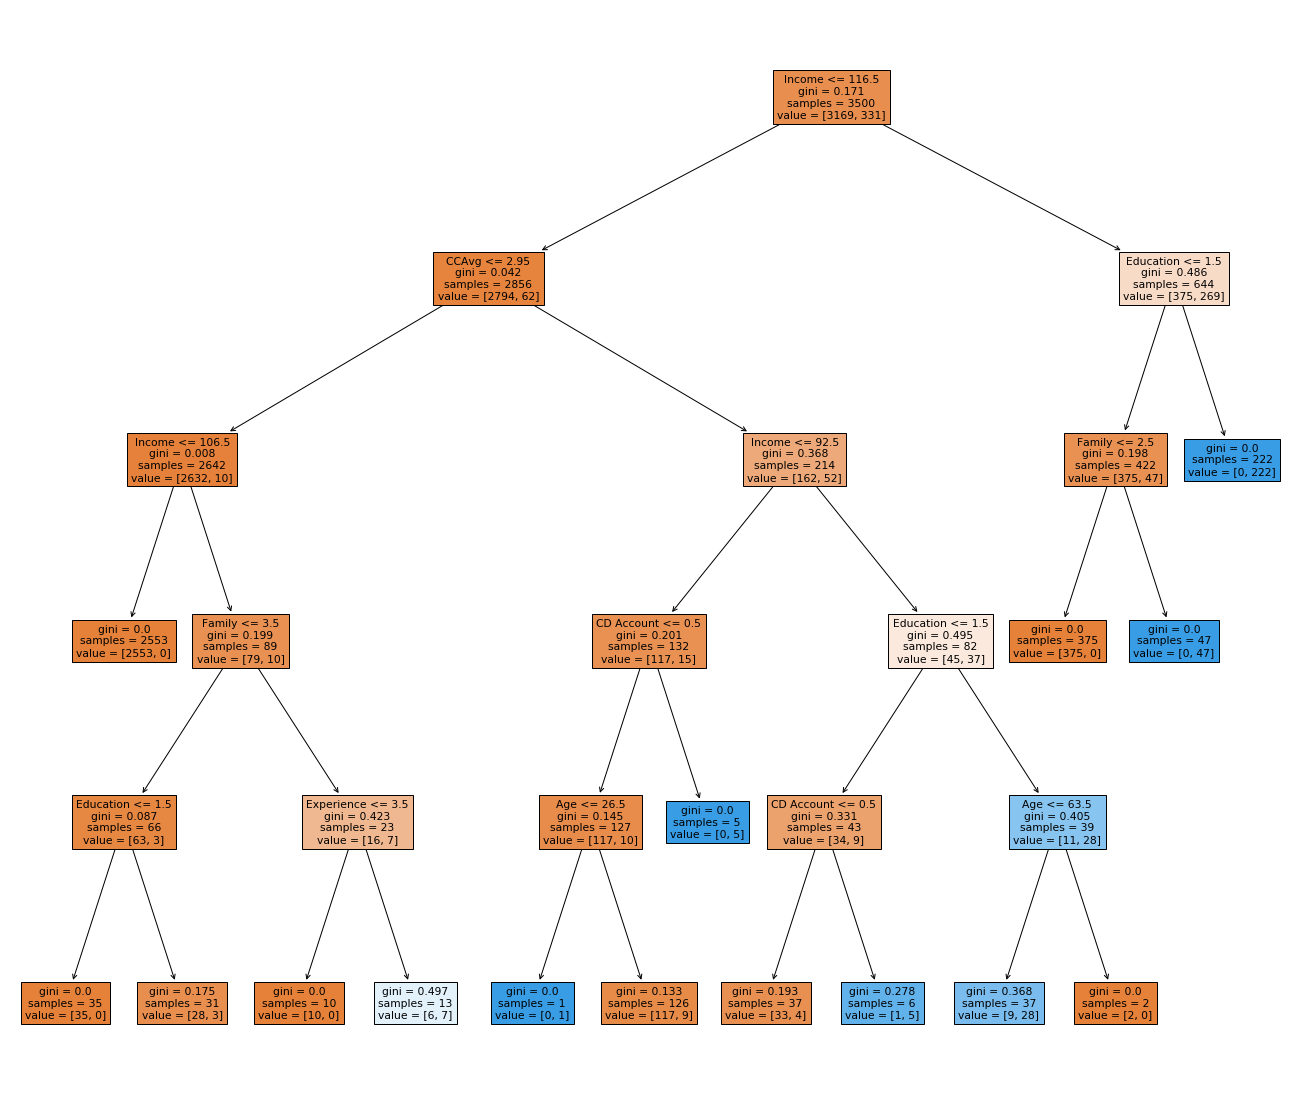

In [33]:
fig=plt.figure(figsize=(23,20))
_=tree.plot_tree(dt1,feature_names=features,filled=True)

In [34]:
''' 2.second pruning tech. with the help of min_samples_leaf'''
dt2=DecisionTreeClassifier(min_samples_leaf=15)

In [35]:
#call function create_model()
dt3=create_model(dt2)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1351
           1       0.95      0.85      0.89       149

    accuracy                           0.98      1500
   macro avg       0.97      0.92      0.94      1500
weighted avg       0.98      0.98      0.98      1500



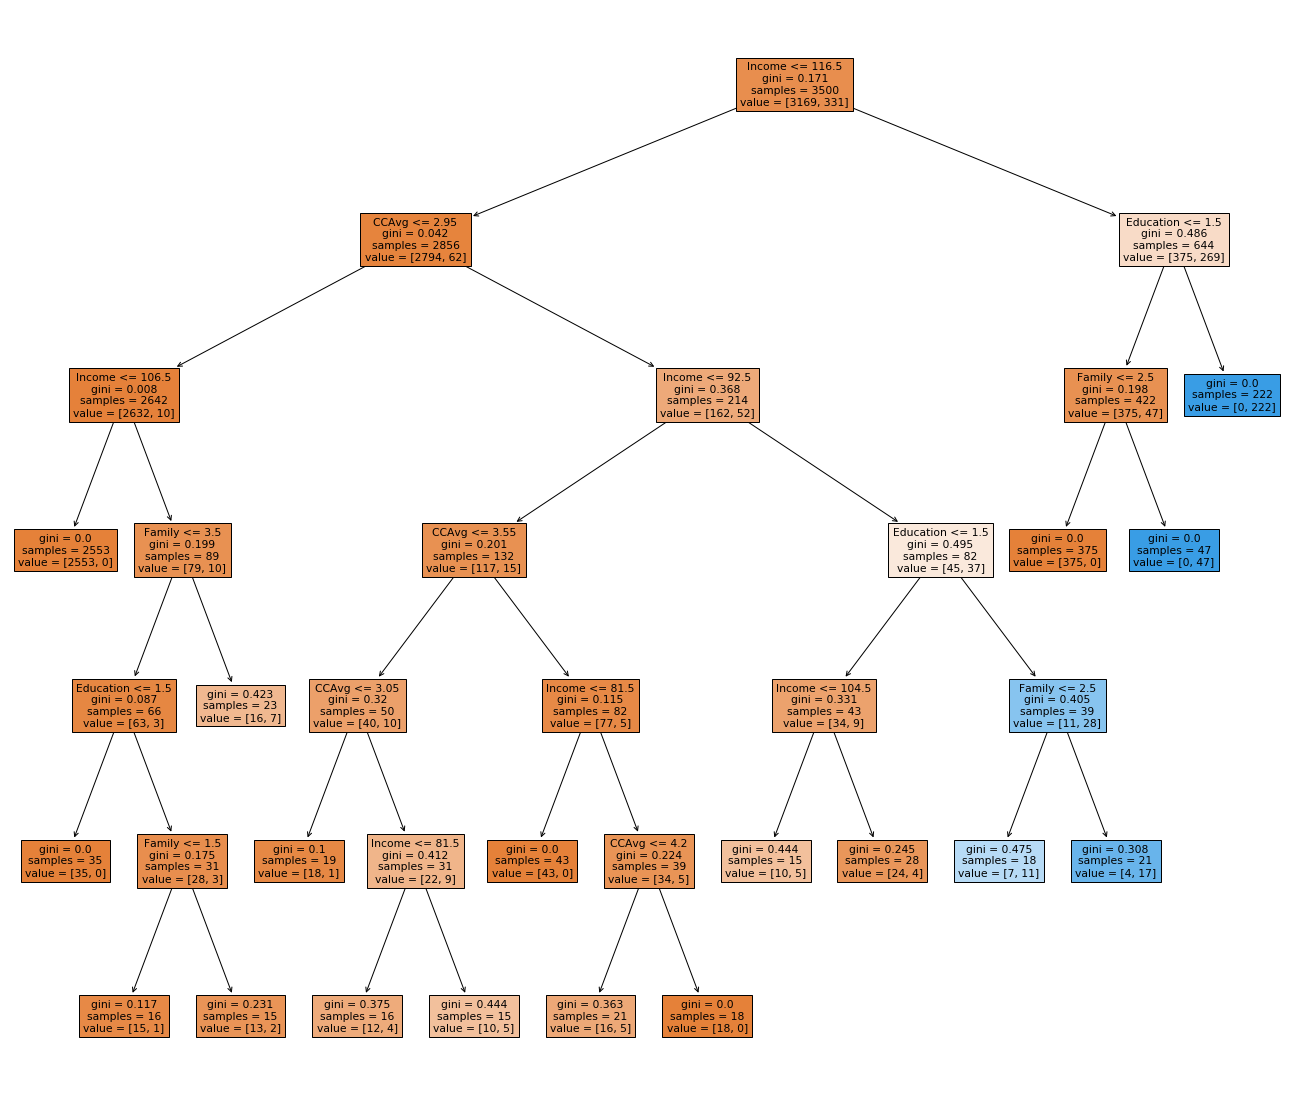

In [36]:
fig=plt.figure(figsize=(23,20))
_=tree.plot_tree(dt3,feature_names=features,filled=True)

In [37]:
#3.Entropy
#we can also check Entropy 
dt3=DecisionTreeClassifier(min_samples_leaf=42,criterion="entropy")
#call function create_model()
dt3=create_model(dt3)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1351
           1       0.88      0.85      0.87       149

    accuracy                           0.97      1500
   macro avg       0.93      0.92      0.93      1500
weighted avg       0.97      0.97      0.97      1500



# bootstraping

In [38]:
from sklearn.ensemble import BaggingClassifier

In [39]:
#create the object of BaggingClassifier
bc=BaggingClassifier(LogisticRegression(),n_estimators=100,max_samples=100,random_state=1)

In [40]:
#call function
create_model(bc)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.80      0.50      0.61       149

    accuracy                           0.94      1500
   macro avg       0.88      0.74      0.79      1500
weighted avg       0.93      0.94      0.93      1500



BaggingClassifier(base_estimator=LogisticRegression(), max_samples=100,
                  n_estimators=100, random_state=1)

In [41]:
#pasting 
bc1=BaggingClassifier(LogisticRegression(),n_estimators=100,max_samples=100,random_state=1,bootstrap=False)

In [42]:
#call function
create_model(bc1)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1351
           1       0.83      0.46      0.59       149

    accuracy                           0.94      1500
   macro avg       0.89      0.72      0.78      1500
weighted avg       0.93      0.94      0.93      1500



BaggingClassifier(base_estimator=LogisticRegression(), bootstrap=False,
                  max_samples=100, n_estimators=100, random_state=1)

In [43]:
rf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=100,max_samples=100,random_state=1)

In [44]:
#call function
create_model(rf)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1351
           1       1.00      0.70      0.82       149

    accuracy                           0.97      1500
   macro avg       0.98      0.85      0.90      1500
weighted avg       0.97      0.97      0.97      1500



BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=100, random_state=1)

In [45]:
#inbuilt class RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [46]:
#create object of RandomForestClassifier
rf1=RandomForestClassifier(n_estimators=20,max_features=6,random_state=1)

In [47]:
#call function
create_model(rf1)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1351
           1       0.95      0.88      0.91       149

    accuracy                           0.98      1500
   macro avg       0.97      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500



RandomForestClassifier(max_features=6, n_estimators=20, random_state=1)

# boosting technique

In [48]:
#ADA Boost technique:
from sklearn.ensemble import AdaBoostClassifier

In [49]:
#create object of AdaBoostClassifier class
ada=AdaBoostClassifier(n_estimators=90) #not more than 100

In [50]:
#call function
create_model(ada)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1351
           1       0.88      0.76      0.82       149

    accuracy                           0.97      1500
   macro avg       0.93      0.87      0.90      1500
weighted avg       0.96      0.97      0.96      1500



AdaBoostClassifier(n_estimators=90)

In [51]:
#Gradient Boosting:
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
#create object of GradientBoosastingClassifier class
gb=GradientBoostingClassifier(n_estimators=30) #not more than 100

In [53]:
#call function
create_model(gb)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1351
           1       0.95      0.83      0.89       149

    accuracy                           0.98      1500
   macro avg       0.97      0.91      0.94      1500
weighted avg       0.98      0.98      0.98      1500



GradientBoostingClassifier(n_estimators=30)

In [54]:
#XGboost means extreme Gradient Boosting

In [55]:
#package install xgboost
!pip install xgboost

In [56]:
from xgboost import XGBClassifier

In [57]:
#create object of XGBClassifier class
xgb=XGBClassifier(n_estimators=10,reg_alpha=1) # not more than 100 

In [58]:
#call function
create_model(xgb)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1351
           1       0.95      0.87      0.91       149

    accuracy                           0.98      1500
   macro avg       0.97      0.93      0.95      1500
weighted avg       0.98      0.98      0.98      1500



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Support Vector Machine

In [59]:
#1.Linear Kernel
from sklearn.svm import LinearSVC

In [60]:
#CREATE object of LinearSVC
lsvc=LinearSVC(random_state=1)

In [61]:
#call function
create_model(lsvc)

              precision    recall  f1-score   support

           0       0.99      0.85      0.92      1351
           1       0.41      0.91      0.56       149

    accuracy                           0.86      1500
   macro avg       0.70      0.88      0.74      1500
weighted avg       0.93      0.86      0.88      1500



LinearSVC(random_state=1)

In [62]:
#we add some error on training (to reduce overfit model)
#call function
create_model(lsvc)
lsvc1=LinearSVC(random_state=1,C=0.5)

              precision    recall  f1-score   support

           0       0.99      0.85      0.92      1351
           1       0.41      0.91      0.56       149

    accuracy                           0.86      1500
   macro avg       0.70      0.88      0.74      1500
weighted avg       0.93      0.86      0.88      1500



In [63]:
#2.Polynomial Kernel
from sklearn.svm import SVC

In [64]:
#create object of svc class
poly_svc=SVC(random_state=1,kernel="poly")

In [65]:
#call function
create_model(poly_svc)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1351
           1       0.95      0.14      0.25       149

    accuracy                           0.91      1500
   macro avg       0.93      0.57      0.60      1500
weighted avg       0.92      0.91      0.88      1500



SVC(kernel='poly', random_state=1)

In [66]:
#3.radial basis kernel

In [67]:
#create object of svc class
r_svc=SVC(random_state=1,kernel="rbf")

In [68]:
#call function
create_model(r_svc)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1351
           1       0.71      0.11      0.20       149

    accuracy                           0.91      1500
   macro avg       0.81      0.55      0.57      1500
weighted avg       0.89      0.91      0.88      1500



SVC(random_state=1)

# Data Imbalance : solve by Sampling Technique

In [69]:
#We handle Imbalance data ,We take some Samling Technique.
''' There are 2 types of Sampling Technique : -
1. Over Sampling TEchnique  2. Under Sampling TEchnique'''

' There are 2 types of Sampling Technique : -\n1. Over Sampling TEchnique  2. Under Sampling TEchnique'

In [70]:
df["Personal Loan"].value_counts()  

0    4520
1     480
Name: Personal Loan, dtype: int64

In [71]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [72]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [73]:
pd.Series(y_train).value_counts()

0    3169
1     331
Name: Personal Loan, dtype: int64

In [74]:
#Undersampler

In [75]:
#create object of  RandomUnderSampler() class
rus = RandomUnderSampler()

In [76]:
x_sample1,y_sample1 = rus.fit_sample(x_train,y_train) 

In [77]:
pd.Series(y_sample1).value_counts()

1    331
0    331
dtype: int64

In [78]:
#Again create object of DecisionTreeClassfier after balance under sampling technique
dt1=DecisionTreeClassifier(max_depth=6)

In [79]:
#Again train our model with the help of decision tree classifier
dt1.fit(x_sample1,y_sample1)

DecisionTreeClassifier(max_depth=6)

In [80]:
y_pred = dt1.predict(x_test)

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1351
           1       0.71      0.99      0.83       149

    accuracy                           0.96      1500
   macro avg       0.86      0.97      0.90      1500
weighted avg       0.97      0.96      0.96      1500



In [82]:
#OverSampler

In [83]:
#create object of  RandomOverSampler() class
ros = RandomOverSampler()

In [84]:
x_sample2,y_sample2 = ros.fit_sample(x_train,y_train) 

In [85]:
pd.Series(y_sample2).value_counts()

1    3169
0    3169
dtype: int64

In [86]:
#Again create object of DecisionTreeClassfier after balance under sampling technique
dt1=DecisionTreeClassifier(max_depth=3)

In [87]:
#Again train model
dt1.fit(x_sample2,y_sample2) 

DecisionTreeClassifier(max_depth=3)

In [88]:
y_pred = dt1.predict(x_test)

In [89]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1351
           1       0.69      0.93      0.79       149

    accuracy                           0.95      1500
   macro avg       0.84      0.94      0.88      1500
weighted avg       0.96      0.95      0.96      1500



In [90]:
#Random under sampler
gbc1=GradientBoostingClassifier(n_estimators=50)

In [91]:
gbc1.fit(x_sample1,y_sample1)#we train the  model

GradientBoostingClassifier(n_estimators=50)

In [92]:
gbc1.fit(x_sample1,y_sample1)#we train the  model

GradientBoostingClassifier(n_estimators=50)

In [93]:
y_pred =gbc1.predict(x_test) #test the model

In [94]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1351
           1       0.75      0.97      0.84       149

    accuracy                           0.96      1500
   macro avg       0.87      0.97      0.91      1500
weighted avg       0.97      0.96      0.97      1500



In [95]:
#Random over sampler
gbc2=GradientBoostingClassifier(n_estimators=10)

In [96]:
gbc2.fit(x_sample2,y_sample2) #we train the  model

GradientBoostingClassifier(n_estimators=10)

In [97]:
y_pred =gbc2.predict(x_test) #test the model

In [98]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1351
           1       0.70      0.95      0.81       149

    accuracy                           0.96      1500
   macro avg       0.85      0.95      0.89      1500
weighted avg       0.97      0.96      0.96      1500

